# Import Libraries

In [1]:
#import libraraies
import pandas as pd
import matplotlib.pyplot as plt

# Read in Data

In [2]:
#Read in the data.
df = pd.read_csv(r'C:\Users\Brian\Crimes_-_2001_to_Present.csv')
pd.set_option('display.max_columns', None)

## Arrest Rate 

In [3]:
#Filter down columns
df = df[['Primary Type','Location Description','Arrest','Year']]

In [4]:
#Solved and unsolved crimes by year
df_solved_crimes = df.groupby(['Year','Arrest'])['Arrest'].count().reset_index(name="count")

#Filter out true and false.
df_true = df_solved_crimes.loc[df_solved_crimes.Arrest]
df_false = df_solved_crimes.loc[~df_solved_crimes.Arrest]

#Rename counts
df_true = df_true.rename(columns={"count": "arrested"})
df_false = df_false.rename(columns={"count": "not_arrested"})

#Combine dataframe
df_arrest_rate = pd.merge(df_true, df_false, on="Year")

#Clean up collumns
df_arrest_rate = df_arrest_rate[['Year','arrested','not_arrested']]


In [5]:
#Create new column for arrest rate.
df_arrest_rate['arrest_rate'] = (df_arrest_rate['arrested'] / df_arrest_rate['not_arrested']) * 100

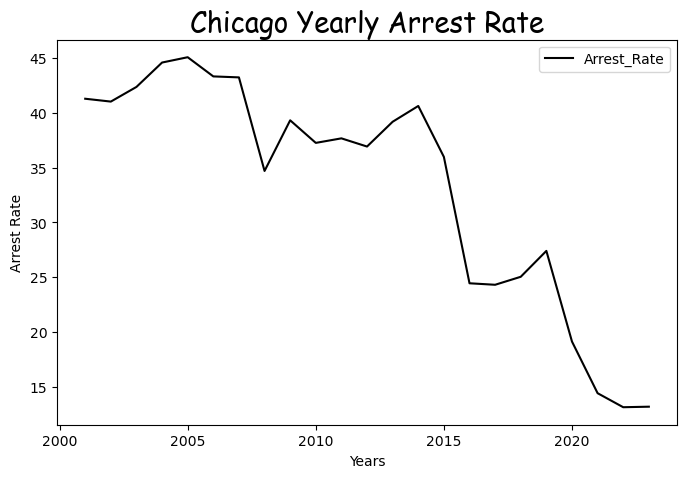

In [6]:
#Create Figure size
plt.figure(figsize=(8,5), dpi=100) #Must be done before creation

#Plot line
plt.plot(df_arrest_rate[['Year']],df_arrest_rate[['arrest_rate']], 'k-', label='Arrest_Rate') #Short hand table creation arguments

# Add a title (specify font parameters with fontdict)
plt.title('Chicago Yearly Arrest Rate', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Years')
plt.ylabel('Arrest Rate')

# Add a legend
plt.legend()

#Show Graph
plt.show()

## Total Crime

In [7]:
#Total Crime count
df_total_crimes = df.groupby(['Year'])['Arrest'].count().reset_index(name="count")

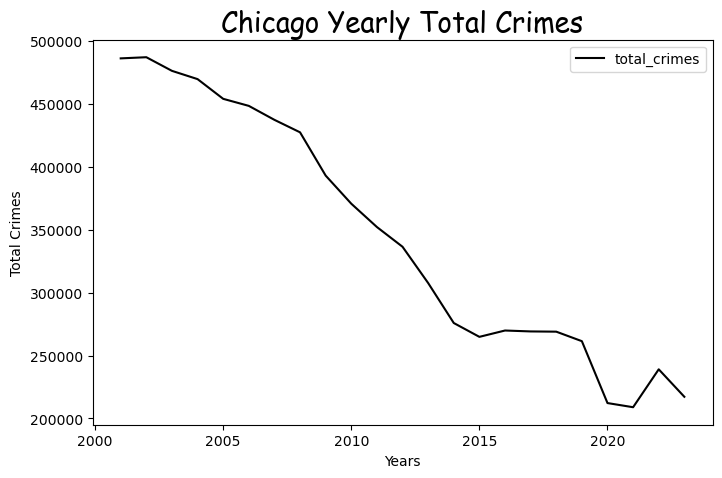

In [8]:
#Create Figure size
plt.figure(figsize=(8,5), dpi=100) #Must be done before creation

#Plot line
plt.plot(df_total_crimes[['Year']],df_total_crimes[['count']], 'k-', label='total_crimes') #Short hand table creation arguments

# Add a title (specify font parameters with fontdict)
plt.title('Chicago Yearly Total Crimes', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Years')
plt.ylabel('Total Crimes')

# Add a legend
plt.legend()

#Show Graph
plt.show()

## Crime Type by year 

In [9]:
df_type_of_crimes = df.groupby(['Year','Primary Type'])['Primary Type'].count().reset_index(name="count")

In [10]:
#Crime types for these 5 years
crimes_2023 = df_type_of_crimes[df_type_of_crimes['Year'] == 2023] 
crimes_2018 = df_type_of_crimes[df_type_of_crimes['Year'] == 2018] 
crimes_2013 = df_type_of_crimes[df_type_of_crimes['Year'] == 2013] 
crimes_2008 = df_type_of_crimes[df_type_of_crimes['Year'] == 2008]
crimes_2003 = df_type_of_crimes[df_type_of_crimes['Year'] == 2003] 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'ARSON'),
  Text(1, 0, 'ASSAULT'),
  Text(2, 0, 'BATTERY'),
  Text(3, 0, 'BURGLARY'),
  Text(4, 0, 'CONCEALED CARRY LICENSE VIOLATION'),
  Text(5, 0, 'CRIM SEXUAL ASSAULT'),
  Text(6, 0, 'CRIMINAL DAMAGE'),
  Text(7, 0, 'CRIMINAL SEXUAL ASSAULT'),
  Text(8, 0, 'CRIMINAL TRESPASS'),
  Text(9, 0, 'DECEPTIVE PRACTICE'),
  Text(10, 0, 'DOMESTIC VIOLENCE'),
  Text(11, 0, 'GAMBLING'),
  Text(12, 0, 'HOMICIDE'),
  Text(13, 0, 'INTERFERENCE WITH PUBLIC OFFICER'),
  Text(14, 0, 'INTIMIDATION'),
  Text(15, 0, 'KIDNAPPING'),
  Text(16, 0, 'LIQUOR LAW VIOLATION'),
  Text(17, 0, 'MOTOR VEHICLE THEFT'),
  Text(18, 0, 'NARCOTICS'),
  Text(19, 0, 'OBSCENITY'),
  Text(20, 0, 'OFFENSE INVOLVING CHILDREN'),
  Text(21, 0, 'OTHER NARCOTIC VIOLATION'),
  Text(22, 0, 'OTHER OFFENSE'),
  Text(

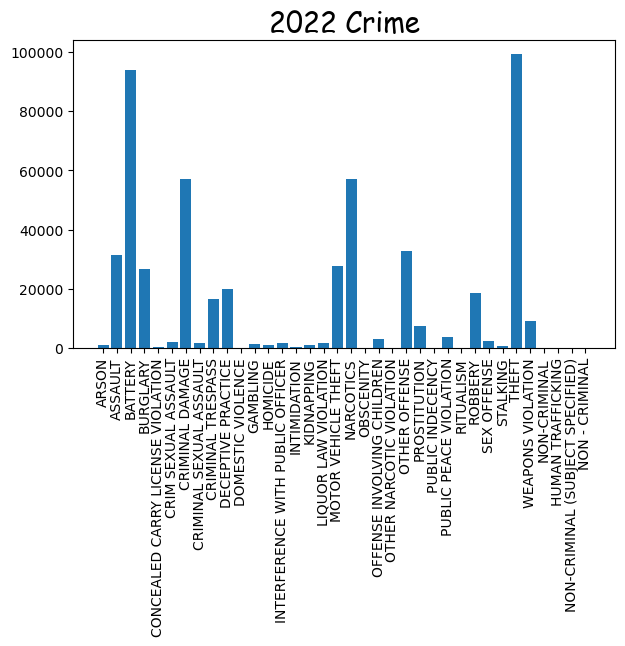

In [11]:
#2023 Distribution

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(7,4), dpi=100)

#Creates chart linkedto  variable. with the lables pased in and the values to plot passed in.
bars = plt.bar(df_type_of_crimes['Primary Type'],df_type_of_crimes['count'])

# Add a title (specify font parameters with fontdict)
plt.title('2022 Crime', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

plt.xticks(rotation=90)

## Violent Crimes Year Over Year

In [12]:
#List of violent Crimes
violent_crimes_list = ['ASSAULT','CRIMINAL SEXUAL ASSAULT','SEX OFFENSE','BATTERY','HOMICIDE','INTIMIDATION','HUMAN TRAFFICKING','CRIM SEXUAL ASSAULT','DOMESTIC VIOLENCE']

#Filtering off violent crimes
violent_crimes = df[df['Primary Type'].isin(violent_crimes_list)]

#Violent crime count by year.
violent_crimes_counts = df.groupby(['Year'])['Primary Type'].count().reset_index(name="count")

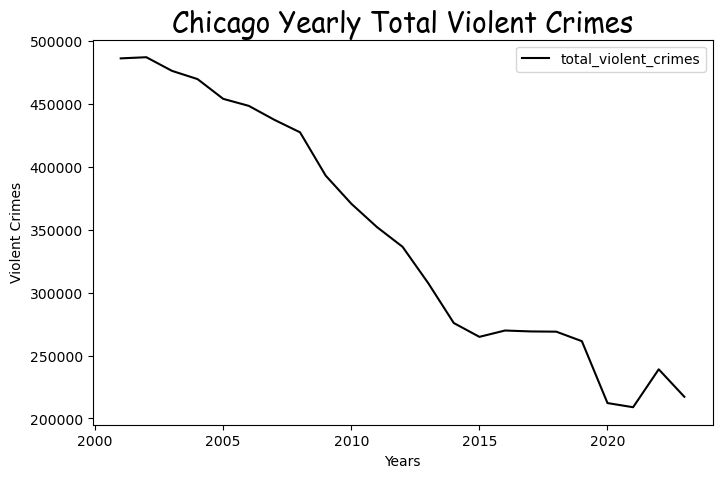

In [13]:
#Create Figure size
plt.figure(figsize=(8,5), dpi=100) #Must be done before creation

#Plot line
plt.plot(violent_crimes_counts[['Year']],violent_crimes_counts[['count']], 'k-', label='total_violent_crimes') #Short hand table creation arguments

# Add a title (specify font parameters with fontdict)
plt.title('Chicago Yearly Total Violent Crimes', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Years')
plt.ylabel('Violent Crimes')

# Add a legend
plt.legend()

#Show Graph
plt.show()

# Crime solved by location 

## Create counts database

In [14]:
#Total by description
total_location_counts = df.groupby(['Location Description'])['Location Description'].count().reset_index(name="total_count")

#by location crime type and arrest counts
crime_location_counts = df.groupby(['Location Description','Primary Type','Arrest'])['Year'].count().reset_index(name="count")

#Filter out true and false for violent crimes.
all_crimes_by_location_true = crime_location_counts.loc[crime_location_counts.Arrest]
all_crimes_by_location_false = crime_location_counts.loc[~crime_location_counts.Arrest]

#Creates 4 buckets 2 violent crime and 2 non violent and each consists arrested and not arrested.
violent_crimes_by_location_arrested = all_crimes_by_location_true[all_crimes_by_location_true['Primary Type'].isin(violent_crimes_list)]
violent_crimes_by_location_not_arrested = all_crimes_by_location_false[all_crimes_by_location_false['Primary Type'].isin(violent_crimes_list)]
non_violent_crimes_by_location_arrested = all_crimes_by_location_true[~all_crimes_by_location_true['Primary Type'].isin(violent_crimes_list)]
non_violent_crimes_by_location_not_arrested = all_crimes_by_location_false[~all_crimes_by_location_false['Primary Type'].isin(violent_crimes_list)]

#Roll up the counts for each file by location.
violent_crimes_by_location_arrested = violent_crimes_by_location_arrested.groupby(['Location Description'])['count'].sum().reset_index(name="violent_crime_arrested_count")
violent_crimes_by_location_not_arrested = violent_crimes_by_location_not_arrested.groupby(['Location Description'])['count'].sum().reset_index(name="violent_crime_not_arrested_count")
non_violent_crimes_by_location_arrested = non_violent_crimes_by_location_arrested.groupby(['Location Description'])['count'].sum().reset_index(name="non_violent_crime_arrested_count")
non_violent_crimes_by_location_not_arrested = non_violent_crimes_by_location_not_arrested.groupby(['Location Description'])['count'].sum().reset_index(name="non_violent_crime_not_arrested_count")

#Merge all the 4 parts of violent and non violent and arrested and not arrested.
location_crime_data_final = pd.merge(total_location_counts, violent_crimes_by_location_arrested, on=["Location Description"])
location_crime_data_final = pd.merge(location_crime_data_final, violent_crimes_by_location_not_arrested, on=["Location Description"])
location_crime_data_final = pd.merge(location_crime_data_final, non_violent_crimes_by_location_arrested, on=["Location Description"])
location_crime_data_final = pd.merge(location_crime_data_final, non_violent_crimes_by_location_not_arrested, on=["Location Description"])

#Crime solved Rate
location_crime_data_final['violent_crime_solved_rate'] = location_crime_data_final['violent_crime_arrested_count'] / (location_crime_data_final['violent_crime_arrested_count'] + location_crime_data_final['violent_crime_not_arrested_count']) * 100
location_crime_data_final['non_violent_crime_solved_rate'] = location_crime_data_final['non_violent_crime_arrested_count'] / (location_crime_data_final['non_violent_crime_arrested_count'] + location_crime_data_final['non_violent_crime_not_arrested_count']) * 100

#Crime solved Rate
location_crime_data_final['total_violent_crime'] = (location_crime_data_final['violent_crime_arrested_count'] + location_crime_data_final['violent_crime_not_arrested_count'])
location_crime_data_final['total_non_violent_crime'] = (location_crime_data_final['non_violent_crime_arrested_count'] + location_crime_data_final['non_violent_crime_not_arrested_count'])


## Create max columns

In [15]:
#Create standard join key
location_crime_data_final['standard_group_by'] = 'temp'

#Create max groupby
max_violent_crime = location_crime_data_final.groupby(['standard_group_by'])['total_violent_crime'].max().reset_index(name="max_violent_crime")
max_non_violent_crime = location_crime_data_final.groupby(['standard_group_by'])['total_non_violent_crime'].max().reset_index(name="max_non_violent_crime")

#Combine max columns
max_df = max_violent_crime.merge(max_non_violent_crime, on='standard_group_by')

#Add max columns to dataframe
location_crime_data_final = location_crime_data_final.merge(max_df, on='standard_group_by')


## Create scoring

In [16]:
#Solved rate scoring
location_crime_data_final['violent_crime_solved_score']  = 100 - location_crime_data_final['violent_crime_solved_rate'] 
location_crime_data_final['non_violent_crime_solved_score']  = 100 - location_crime_data_final['non_violent_crime_solved_rate'] 

#Total crime score
location_crime_data_final['total_violent_crime_score'] = (location_crime_data_final['total_violent_crime'] / location_crime_data_final['max_violent_crime']) * 100
location_crime_data_final['total_non_violent_crime_score'] = (location_crime_data_final['total_non_violent_crime'] / location_crime_data_final['max_non_violent_crime']) * 100

#Create total score
location_crime_data_final['location_crime_data_final'] = (location_crime_data_final['violent_crime_solved_score'] * .3) + (location_crime_data_final['total_violent_crime_score'] * .3) + (location_crime_data_final['non_violent_crime_solved_score'] * .2) + (location_crime_data_final['total_non_violent_crime_score'] * .2)

In [17]:
#Filter out columns
location_crime_data_final = location_crime_data_final[['Location Description', 'violent_crime_arrested_count',
       'violent_crime_not_arrested_count', 'non_violent_crime_arrested_count',
       'non_violent_crime_not_arrested_count', 'violent_crime_solved_rate',
       'non_violent_crime_solved_rate', 'total_violent_crime',
       'total_non_violent_crime',
       'location_crime_data_final']]

#Creates header column
location_crime_data_final = location_crime_data_final.sort_values(by='location_crime_data_final', ascending=False)


In [18]:
#Location crime score
location_crime_data_final[['Location Description','location_crime_data_final']]

,Location Description,location_crime_data_final
122,STREET,85.750410
101,RESIDENCE,82.549264
17,APARTMENT,76.423301
118,SIDEWALK,56.172000
82,MEDICAL / DENTAL OFFICE,47.947091
...,...,...
52,CTA PLATFORM,26.992836
33,CHA HALLWAY/STAIRWELL/ELEVATOR,26.734205
98,POLICE FACILITY / VEHICLE PARKING LOT,22.880965
77,JAIL / LOCK-UP FACILITY,20.642200


In [19]:
#Load to website and create write up for this as a data project.